In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
sns.set_style('whitegrid')
%matplotlib inline

In [4]:
titanic = pd.read_csv('train.csv')

### Percent of suvivors

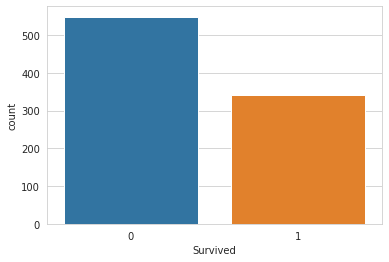

In [5]:
round((len(titanic[titanic.Survived == 1])/len(titanic)) * 100, 2)

sns.countplot(x='Survived', data=titanic)

Understanding NaNs

In [16]:
for column in titanic.columns.values:
    print(column, titanic[column].isnull().sum())

PassengerId 0
Survived 0
Pclass 0
Name 0
Sex 0
Age 0
SibSp 0
Parch 0
Ticket 0
Fare 0
Embarked 0


### Define values of NaN

The embarked local has 2 persons with null value, so i setting zero for this, because this information is not relevant.

In [7]:
titanic.loc[titanic['Embarked'].isnull(), 'Embarked'] = 0

In [8]:
titanic.loc[titanic['Embarked'].isnull(), 'Embarked']

Series([], Name: Embarked, dtype: object)

### Handling cabin data

On this case we are going to delete this column because it has much missing data

In [9]:
titanic = titanic.drop('Cabin', axis=1)

In [10]:
titanic

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S
...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C


### Average age

Defining all the ages with NaN and setting with average of age

In [13]:
for item in titanic:
    for sex in ['male', 'female']:
        for pclass in [1,2,3]:
            avg_age = titanic[titanic.Sex == sex][titanic.Pclass == pclass]['Age'].median
            titanic.loc[(titanic['Age'].isnull()) & (titanic.Sex == sex) & (titanic.Pclass == pclass), 'Age'] = avg_age

/home/dev/.local/lib/python3.6/site-packages/ipykernel_launcher.py:4: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  after removing the cwd from sys.path.


In [15]:
titanic.loc[titanic['Age'].isnull()]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked


### Identifying People

Identifying people per titles

In [59]:
for t in [titanic]:
    titanic['Title'] = t.Name.str.extract('([A-Za-z]+)\.')

Verifying title per sex

In [60]:
pd.crosstab(titanic.Title, titanic.Sex)

Sex,female,male
Title,,
Capt,0,1
Col,0,2
Countess,1,0
Don,0,1
Dr,1,6
Jonkheer,0,1
Lady,1,0
Major,0,2
Master,0,40


### Reduce our list of titles

Now we have our list with quantity of title per sex, so we are going to clean the list, reducing for only 5 titles

In [63]:
for t in [titanic]:
    t['Title'] = titanic['Title'].replace(['Capt', 'Countess', 'Col', 'Dr', 'Major', 'Don', 'Jonkheer', 'Lady', 'Rev', 'Sir'], 'Rare')
    t['Title'] = titanic['Title'].replace('Mlle', 'Miss')
    t['Title'] = titanic['Title'].replace('Ms', 'Miss')
    t['Title'] = titanic['Title'].replace('Mme', 'Mrs')

Verifying title per sex

In [64]:
pd.crosstab(titanic.Title, titanic.Sex)

Sex,female,male
Title,,
Master,0,40
Miss,185,0
Mr,0,517
Mrs,126,0
Rare,3,20


Changing the column type 'title' which is string to int

In [65]:
title_dict = {'Mr': 1, "Miss": 2, "Mrs": 3, "Master": 4, "Rare": 5}

for t in [titanic]:
    t['Title'] = titanic['Title'].map(title_dict)
    t['Title'] = titanic['Title'].fillna(0)
    
titanic.head(2)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Title
0,1,0,3,"Braund, Mr. Owen Harris",male,22,1,0,A/5 21171,7.2500,S,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38,1,0,PC 17599,71.2833,C,3


Passengers list who were alone

In [69]:
titanic['FamilySize'] = titanic['SibSp'] + titanic['Parch'] + 1

titanic['IsAlone'] = 0

titanic.loc[titanic.FamilySize == 1, 'IsAlone'] = 1

titanic.head(3)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Title,FamilySize,IsAlone
0,1,0,3,"Braund, Mr. Owen Harris",male,22,1,0,A/5 21171,7.2500,S,1,2,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38,1,0,PC 17599,71.2833,C,3,2,0
2,3,1,3,"Heikkinen, Miss. Laina",female,26,0,0,STON/O2. 3101282,7.9250,S,2,1,1


### Categorizing fares

In [72]:
titanic['Fare'].describe()

count    891.000000
mean      32.204208
std       49.693429
min        0.000000
25%        7.910400
50%       14.454200
75%       31.000000
max      512.329200
Name: Fare, dtype: float64